<a href="https://colab.research.google.com/github/marekhennig/175IC-machine-learning/blob/main/Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692
X_train: (1070, 8)
y_train: (1070,)
X_test: (268, 8)
y_test: (268,)
Epoch 1/50
107/107 [==============================] - 1s 3ms/step - loss: 0.2093 - val_loss: 0.0333
Epoch 2/50
107/107 [==============================] - 0s 1ms/step - loss: 0.0313 - val_loss: 0.0304
Epoch 3/50
107/107 [========

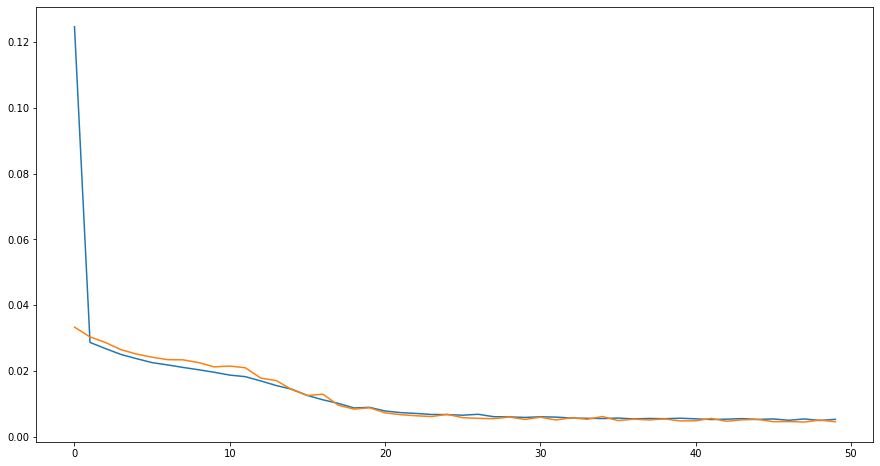

0.2474207878112793

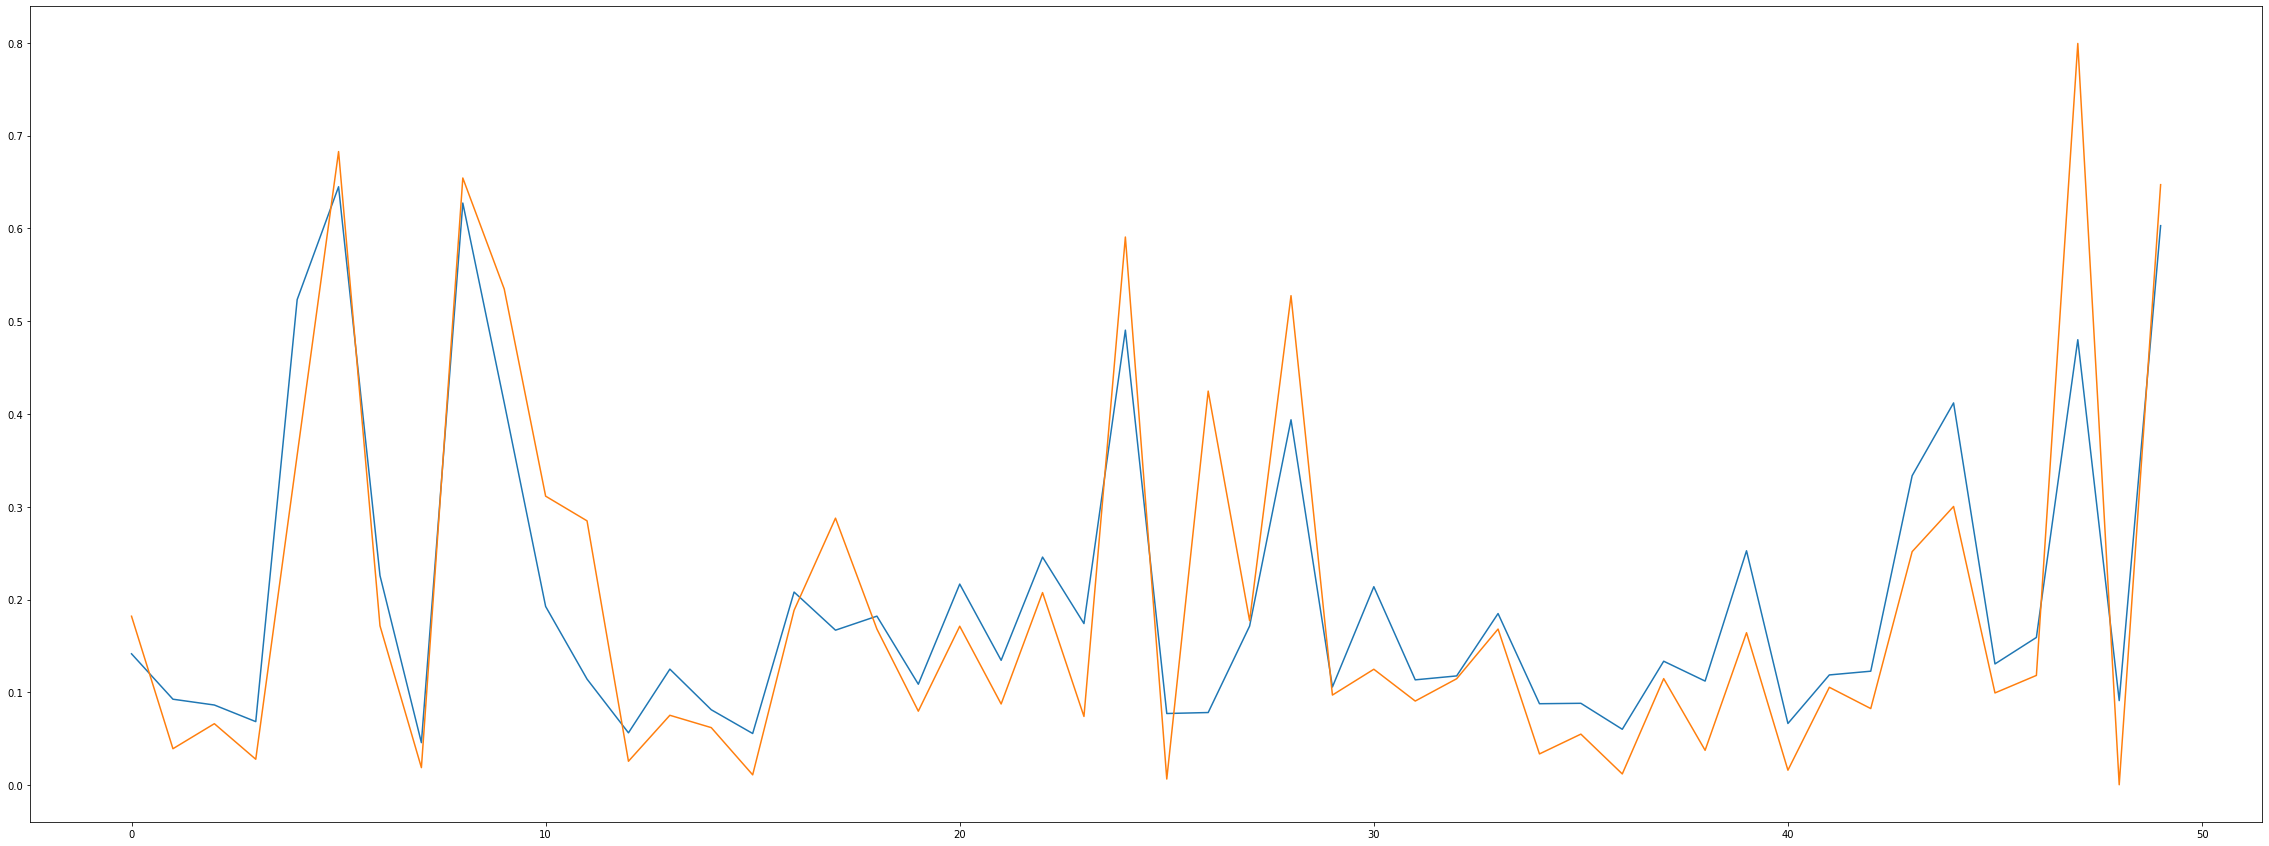

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def custom_scale(df, normalize_tab=normalize_data_tab, target=False):
    # jeśli obliczamy dla data
    if target == False:
        # dla każdej kolumny którą należy normalizować
        for i, key in enumerate(['age', 'bmi', 'children']):
            # obliczamy znormalizowaną wartość zgodnie ze wzorem
            df[key] = (df[key] - normalize_tab[i*2+1]) / (normalize_tab[i*2] - normalize_tab[i*2+1])
    else:
        # obliczamy ze wzoru dla jednej kolumny
        df = (df - normalize_tab[1]) / (normalize_tab[0] - normalize_tab[1])
    
    return df

df_raw = pd.read_csv("https://storage.googleapis.com/esmartdata-courses-files/ml-course/insurance.csv")
print(df_raw[:10])
df = df_raw.copy()
df = to_category(df)
df = pd.get_dummies(df, drop_first=True)
data, target = data_target_split(df)

normalize_data_tab = np.array([data['age'].max(), data['age'].min(), 
                               data['bmi'].max(), data['bmi'].min(), 
                               data['children'].max(), data['children'].min()])
normalize_target_tab = np.array([target.max(), target.min()])

data = custom_scale(data)
target = custom_scale(target, normalize_target_tab, True)
normalize_data_tab = np.array([data['age'].max(), data['age'].min(), 
                               data['bmi'].max(), data['bmi'].min(), 
                               data['children'].max(), data['children'].min()])
normalize_target_tab = np.array([target.max(), target.min()])

def to_category(df_raw):
    for key in df_raw.keys():
        if df_raw[key].dtype == "object":
            df_raw[key] = df_raw[key].astype("category")
    return df_raw

def data_target_split(df):
    data = df.copy()
    target = data.pop('charges')

    return data, target

def scale(df, min_max_scaler):  
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(df)
    min_max_scaler
    df = pd.DataFrame(x_scaled)

    return df

def normalized_to_real(x, normalize_tab=normalize_target_tab):
    return x* (normalize_tab[0]-normalize_tab[1]) + normalize_tab[1]




X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(8,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='msle')
hist = model.fit(X_train, y_train, batch_size=10, epochs=50, validation_data=(X_test, y_test))


hist.history.keys()
plt.figure(figsize=(15,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

temp = []
temp2 = []
for i in range(50):
    temp.append(model.predict(X_test[i].reshape(1,-1))[0][0] * (normalize_target_tab[0]-normalize_target_tab[1]) + normalize_target_tab[1])

temp2 = y_test[:50] * (normalize_target_tab[0]-normalize_target_tab[1]) + normalize_target_tab[1]
plt.figure(figsize=(40,15))
plt.plot(temp)
plt.plot(temp2)
plt.plot()

def predict_charge(a):
    a = pd.DataFrame({'age':                pd.Series(a[0], dtype='int64'),
                    'bmi':                pd.Series(a[2], dtype='float64'),
                    'children':           pd.Series(a[3], dtype='int64'),
                    'sex_male':           pd.Series(1 if a[1] == 'male' else 0, dtype='uint8'),
                    'smoker_yes':         pd.Series(1 if a[4] == 'yes'  else 0, dtype='uint8'),
                    'region_northwest':   pd.Series(1 if a[5] == 'northwest' else 0, dtype='uint8'),
                    'region_southeast':   pd.Series(1 if a[5] == 'southeast' else 0, dtype='uint8'),
                    'region_southwest':   pd.Series(1 if a[1] == 'southwest' else 0, dtype='uint8')})
    a = custom_scale(a, normalize_data_tab)
    a = np.array(a)
    return (model.predict(a)[0][0] * (normalize_target_tab[0]-normalize_target_tab[1]) + normalize_target_tab[1])


predict_charge([37, 'male', 29.88, 2, 'no', 'northeast'])